<a href="https://colab.research.google.com/github/monirsk/TensorFlow_Thesis/blob/main/tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
#shape and type

print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)


In [18]:
# Inspecting the dataset

print(x_train[:5])
print(y_train[:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 1 9]


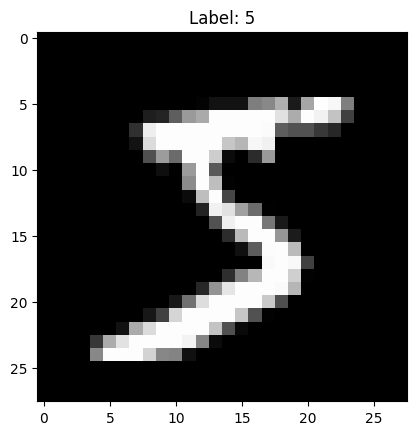

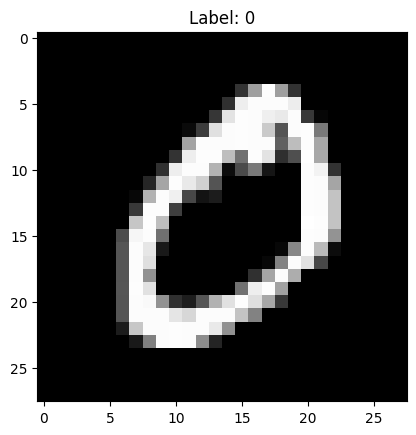

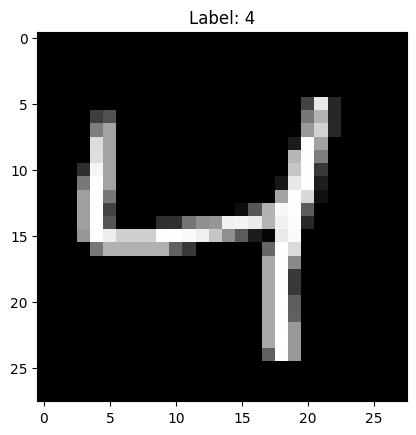

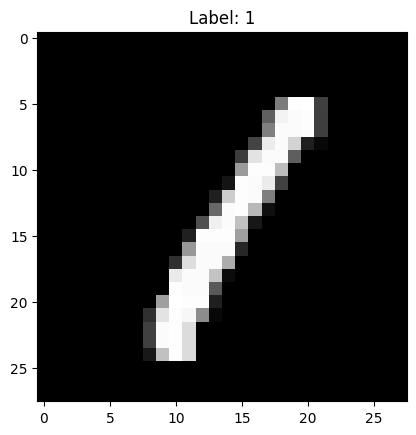

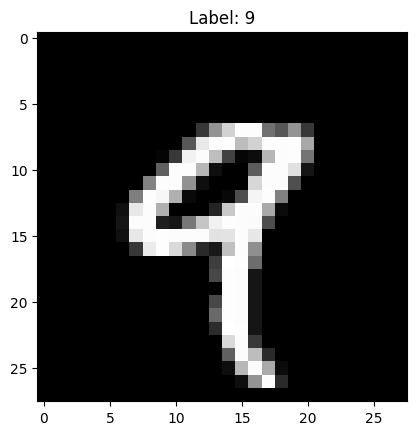

In [19]:
import matplotlib.pyplot as plt

# Display the first 5 images in the training set
for i in range(5):
    plt.imshow(x_train[i], cmap="gray")  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [20]:
x_train = x_train.reshape(-1, 28*28).astype("float32")/255.0
x_test = x_test.reshape(-1, 28*28).astype("float32")/255.

In [21]:
print(x_train[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Incase you want ot visualize the data et again, you need to reshape it back as the data is currently not in a 2D grid.

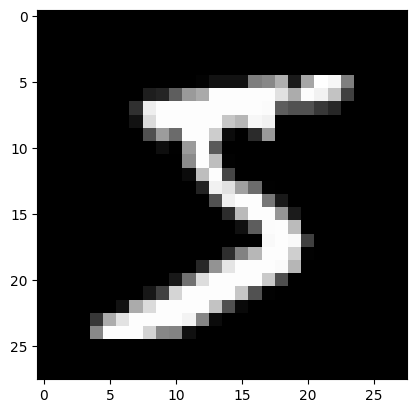

In [22]:
# This is how you can do it, for example let's do it with only one image

image = x_train[0].reshape(28,28)
plt.imshow(image, cmap="gray")
plt.show()

# Sequential API (Very convenient but not flexible)

In [23]:
model = keras.Sequential(
  [
      layers.Dense(512, activation = "relu"),
      layers.Dense(256, activation = 'relu'),
      layers. Dense(10),
  ]
)

In [24]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [25]:
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose =2)

Epoch 1/5
1875/1875 - 16s - 8ms/step - accuracy: 0.9446 - loss: 0.1832
Epoch 2/5
1875/1875 - 20s - 11ms/step - accuracy: 0.9756 - loss: 0.0789
Epoch 3/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9825 - loss: 0.0543
Epoch 4/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9874 - loss: 0.0401
Epoch 5/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9896 - loss: 0.0314


In [33]:
# Save weights only
model.save_weights('my_model_weights.weights.h5')

# To load the weights into the same model architecture later
model.load_weights('my_model_weights.weights.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.1186


[0.09760543704032898, 0.9753999710083008]

In [34]:
model.evaluate(x_test, y_test, batch_size = 32, verbose =2)

313/313 - 1s - 3ms/step - accuracy: 0.9754 - loss: 0.0976


[0.09760543704032898, 0.9753999710083008]

# Checking the prediction for a particular picture

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
image_index = 6
image = x_test[image_index]
actual_label = y_test[image_index]

# Preprocess the image as done for the data set beofre training
image_reshaped = image.reshape(1,28*28)
image_reshaped = image_reshaped.astype('float32') / 255.0

In [62]:
# Get prediction
predicted_probability = model.predict(image_reshaped)
predicted_class = np.argmax(predicted_probability)
print(predicted_probability)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[ -8.299797   -2.3246784  -7.7502484 -10.339358   12.694265   -6.386837
   -5.206722   -3.4706764   3.2578678   3.4801471]]


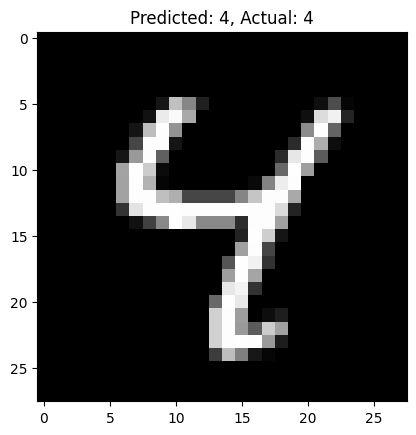

In [63]:
image = x_test[image_index].reshape(28, 28)
plt.imshow(image, cmap='gray')  # Display the image
plt.title(f"Predicted: {predicted_class}, Actual: {actual_label}")  # Display prediction and actual label
plt.show()